# **Ejercicio 1**
- Dadas las siguientes matrices A y K,
que representan la imagen y el kernel,
respectivamente.
-Realizar la operación de convolución
que resulte en la matriz C


In [5]:
import numpy as np
import cv2

A = np.random.randint(7, size=(6,6))/1.0


K = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])/1.0

C = cv2.filter2D(A, -1, K)

print(f"A=\n{A}\nK=\n{K}\nC=\n{C}")


A=
[[4. 2. 3. 6. 3. 3.]
 [6. 0. 0. 5. 1. 6.]
 [2. 1. 3. 2. 4. 3.]
 [1. 1. 2. 3. 4. 0.]
 [6. 0. 6. 1. 0. 3.]
 [6. 2. 4. 1. 3. 6.]]
K=
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
C=
[[  0. -14.  18.   2.  -4.   0.]
 [  0. -12.  15.   3.   0.   0.]
 [  0.  -3.   9.   5.   0.   0.]
 [  0.   3.   6.  -1.  -3.   0.]
 [  0.  -1.   3. -11.   6.   0.]
 [  0.  -4.   0. -14.  14.   0.]]


# **Ejercicio 2**
Dada una imagen A, aplicar la convolución con un kernel que permita suavizar los
píxeles de la imagen puppy.png mediante un filtro de media. Variar el tamaño del filtro e imprimir la imagen resultante.

--------------Imagen Original--------------


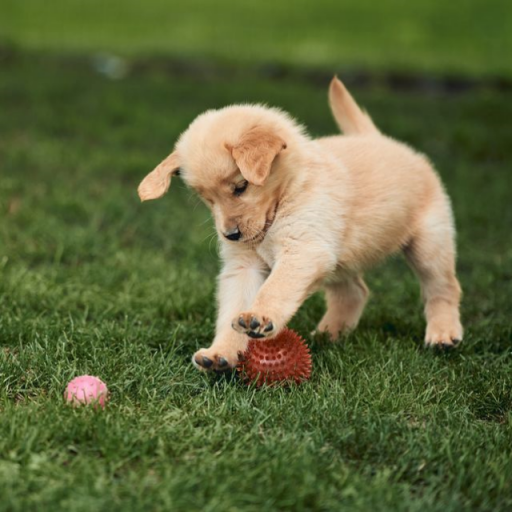

--------------Imagen filtrada--------------


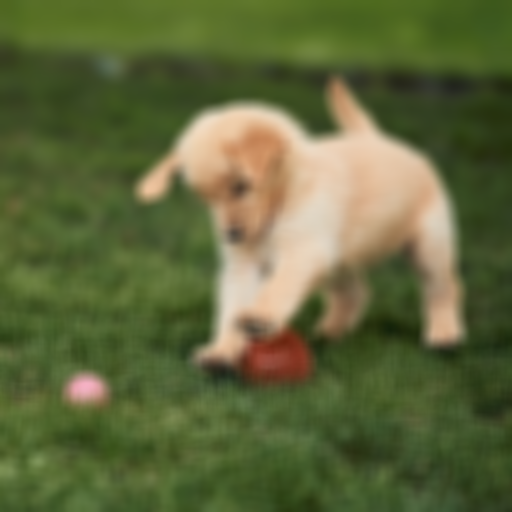

In [21]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

A = cv2.imread('puppy.png', 1)
A = A.astype(np.float32)

n = 15 #@param {type:"slider", min:1, max:21, step:2}
kernel = np.ones((n,n))/n**2

c = cv2.filter2D(A, -1, kernel)
print("--------------Imagen Original--------------")
cv2_imshow(A)
print("--------------Imagen filtrada--------------")
cv2_imshow(c)

# **Ejercicio 3**
- Realiza un Programa en Python que permita visualizar la transformada de Fourier de
una imagen
- Usa funciones de numpy para calcular la magnitud y fase


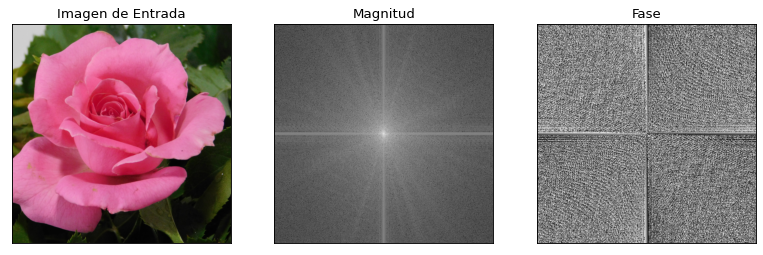

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

IMG = cv2.imread('rose.png',1)
IMG = cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB)
IMG_OG = cv2.imread('rose.png' ,0)
F = np.fft.fft2(IMG_OG)
F = np.fft.fftshift(F)

mag= 20*np.log(np.abs(F))
phase = np.angle(F)

plt.figure(figsize=(12, 8), dpi=80)

plt.subplot(131)
plt.imshow(IMG, cmap = 'gray')
plt.title('Imagen de Entrada')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(mag, cmap = 'gray')
plt.title('Magnitud') 
plt.xticks([]) 
plt.yticks([])

plt.subplot(133)
plt.imshow(phase, cmap = 'gray')
plt.title('Fase') 
plt.xticks([])
plt.yticks([])
plt.show()

# **Ejercicio 4**
- Dada una imagen A, aplicar el filtrado en el dominio de la frecuencia con un kernel que
permita suavizar los pixeles de la imagen mediante un filtro de media.
- Variar el tamaño del filtro e imprimir la imagen resultante.
- Comparar el resultado con el filtrado espacial del Ejemplo 2.

Text(0.5, 1.0, 'Transformada inversa de fourier')

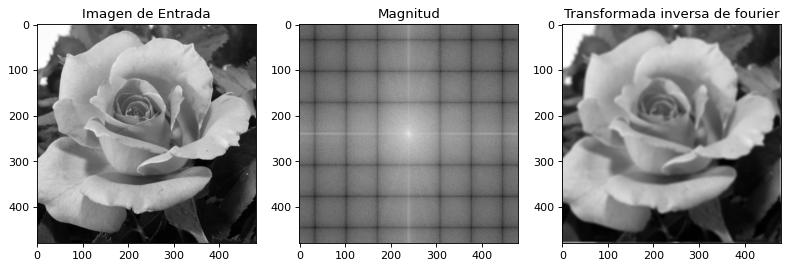

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

IMG = cv2.imread('rose.png',0)
n = 7 #@param {type:"slider", min:1, max:21, step:2}
kernel = np.ones((n,n))/n**2
k_w, k_h = kernel.shape

i_w, i_h = IMG.shape

x_o, y_o = int(i_w/2 - k_w/2), int(i_h/2 - k_h/2)
x_i, y_i = x_o+k_w, y_o+k_h

kzeros = np.zeros((i_w,i_h))
kzeros[x_o:x_i, y_o:y_i]=kernel

KF = np.fft.fft2(kzeros)
KF = np.fft.fftshift (KF)
C = F*KF
mag = 20*np. log(np.abs(C))

c = np.fft.ifft2(C)
c = np.abs(np. fft. fftshift(c))

plt.figure(figsize=(12, 8), dpi=80)
plt.subplot(131)
plt.imshow(IMG, cmap = 'gray')
plt.title('Imagen de Entrada')

plt.subplot(132)
plt.imshow(mag, cmap = 'gray')
plt.title('Magnitud')

plt.subplot(133)
plt.imshow(c, cmap = 'gray')
plt.title('Transformada inversa de fourier') 

# **Ejercicio 5**
Para la imagen de entrada dovercastle.png aplica el
filtrado espacial para producir diferentes efectos en la
imagen:
1. Filtro de media
2. Filtro Sharpen
3. Filtro de Sobel en X y Y
4. Umbralización
5. Canny

Text(0.5, 1.0, 'Canny')

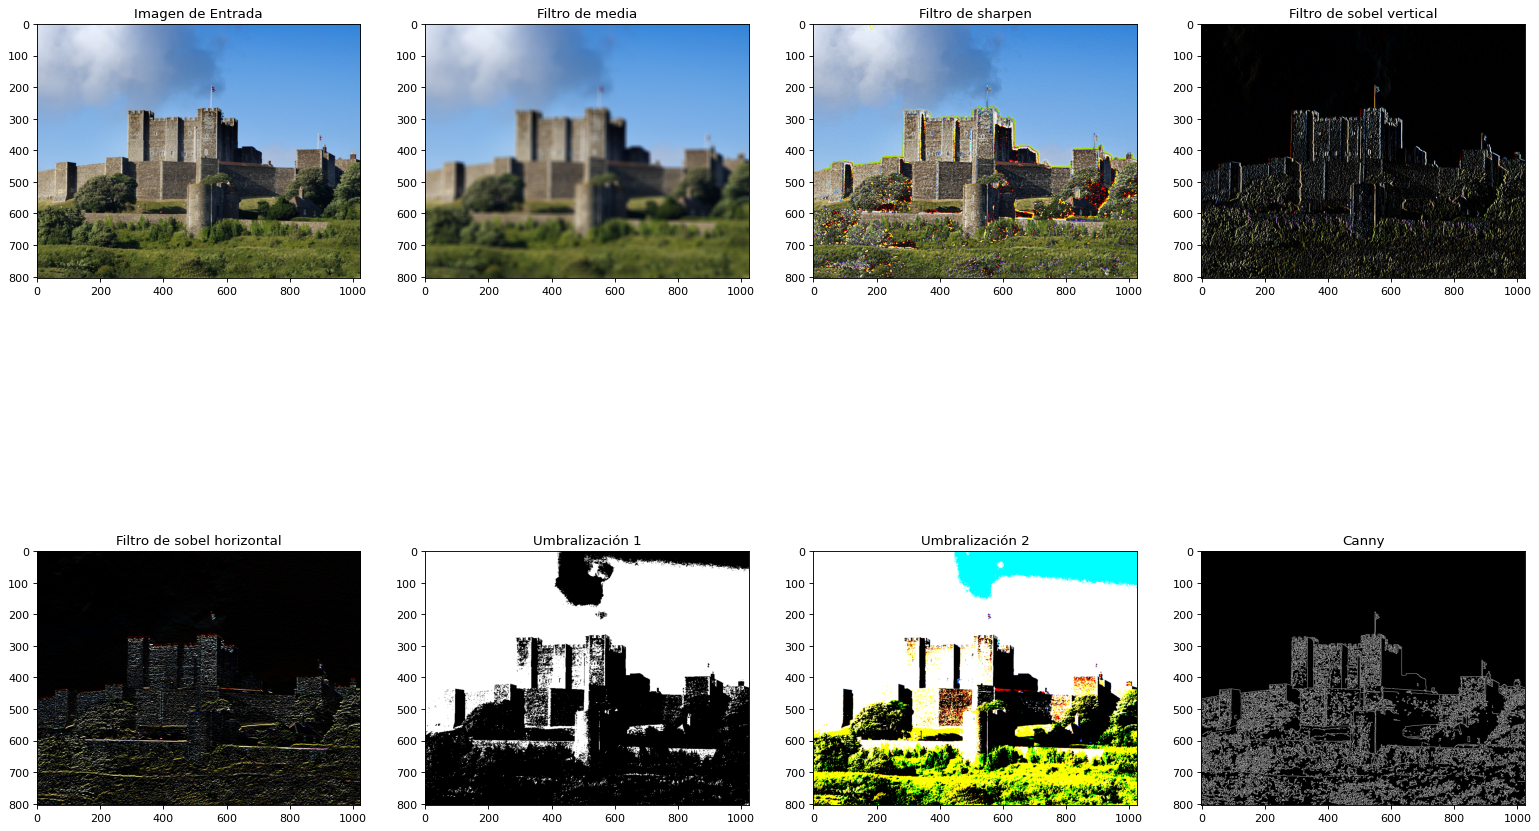

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

IMG = cv2.imread('dovercastle.png', 1)
IMG = cv2.cvtColor(IMG,  cv2.COLOR_BGR2RGB)

# Filtro de media
n = 15 #@param {type:"slider", min:1, max:21, step:2}
km = np.ones((n,n))/n**2
cm = cv2.filter2D(IMG, -1, km)

# Filtro de sharpen
det = IMG - cm
cs = IMG + det

# Filtro de sobel
kso_v = np.array([[-1,0,1], [-2, 0, 2], [-1, 0, 1]])/1.0
kso_h = np.transpose(kso_v)
cso_v = cv2.filter2D(IMG, -1, kso_v)
cso_h = cv2.filter2D(IMG, -1, kso_h)

# Umbralizacion
GR = cv2.cvtColor(IMG, cv2.COLOR_RGB2GRAY)
_, cu_a = cv2.threshold(GR, 127, 255, cv2.THRESH_BINARY)
_, cu_b = cv2.threshold(IMG, 80, 255, cv2.THRESH_BINARY)

# Canny
canny_th1 = 100 #@param {type:"slider", min:1, max:255, step:1} 
canny_th2 = 200 #@param {type:"slider", min:1, max:255, step:1} 
# th2 Tiene que ser mayor que th1

cc = cv2.Canny(IMG, canny_th1, canny_th2)

plt.figure(figsize=(24, 16), dpi=80)

plt.subplot(241)
plt.imshow(IMG)
plt.title('Imagen de Entrada')

plt.subplot(242)
plt.imshow(cm)
plt.title('Filtro de media')

plt.subplot(243)
plt.imshow(cs)
plt.title('Filtro de sharpen') 

plt.subplot(244)
plt.imshow(cso_v)
plt.title('Filtro de sobel vertical') 

plt.subplot(245)
plt.imshow(cso_h)
plt.title('Filtro de sobel horizontal') 

plt.subplot(246)
plt.imshow(cu_a,  cmap='gray')
plt.title('Umbralización 1') 

plt.subplot(247)
plt.imshow(cu_b)
plt.title('Umbralización 2') 

plt.subplot(248)
plt.imshow(cc,  cmap='gray')
plt.title('Canny') 